<div style="border-radius:10px; padding: 15px; background-color: #EFEDF8; font-size:120%; text-align:left">

<h1 align="left"><font color=#5F519C>Spaceship Titanic</font></h1>

---
<h2 align="right" style="font-size: 16px; color: #9388C2;"> by: Víctor Nuñez</h2>


Data: https://www.kaggle.com/competitions/spaceship-titanic

# **Step 1 | Setup and Initialization**

## Importing Necessary Libraries

In [ ]:
#Data
import pandas as pd
import numpy as np
from scipy.stats import skew
import scipy

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import hvplot.pandas

#Machine Learning
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import setup, compare_models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# **Step 2 | Initial Data Analysis**

## Dataset Overview

In [ ]:
#target
set(train)-set(test)

{'Transported'}

In [ ]:
display('Train dataset:',train.head()); display('Test dataset:',test.head())

'Train dataset:'

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


'Test dataset:'

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# **Step 3 | Preprocessing and Cleaning**

## Combine data

In [ ]:
#Target and ID
target = train['Transported']; train.drop(['Transported'], axis = 1, inplace =  True)

ID = test['PassengerId']

df = pd.concat([train, test], axis = 0).reset_index(drop = True)

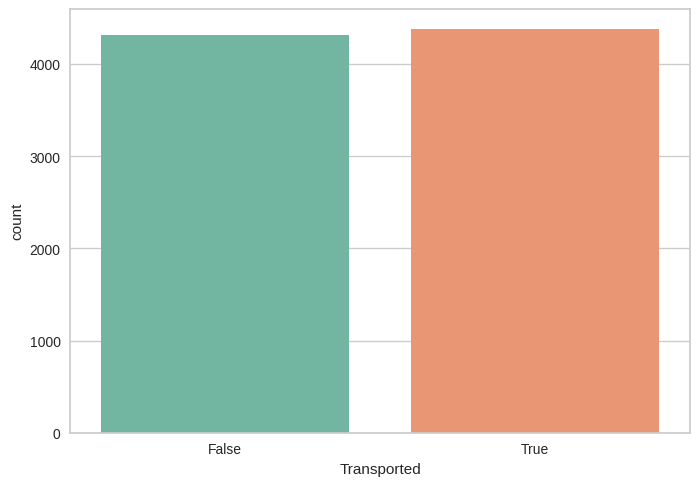

In [ ]:
plt.figure()
sns.countplot(x = target, palette='Set2')
plt.show()

In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

- **PassengerId**

In [ ]:
df['GroupId'] =df['PassengerId'].apply(lambda id: id.split('_')[0]).astype(int)
df['numId'] =df['PassengerId'].apply(lambda id: id.split('_')[1]).astype(int)

df.drop(['PassengerId'], axis = 1, inplace = True)

In [ ]:
print('Unique NumId = {}'.format(len(df['numId'].unique())))
print('Unique GroupId = {}'.format(len(df['GroupId'].unique())))

Unique NumId = 8
Unique GroupId = 9280


In [ ]:
df.drop(['GroupId'], axis = 1, inplace = True)

## Handling missing values

### Categoricals

In [ ]:
df.select_dtypes(object).isna().sum()

HomePlanet     288
CryoSleep      310
Cabin          299
Destination    274
VIP            296
Name           294
dtype: int64

In [ ]:
df =  df.drop(['Name'], axis = 1)

- **HomePlanet**

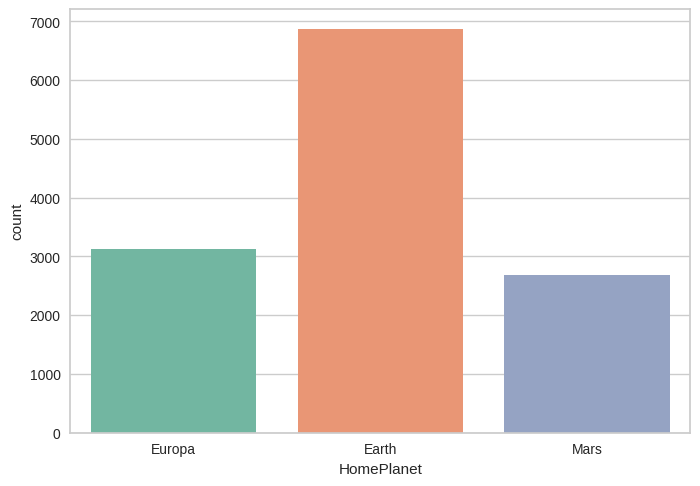

In [ ]:
sns.countplot(x=df.HomePlanet,palette='Set2')
plt.show()

In [ ]:
print('values as % of the total')
df.HomePlanet.value_counts()/len(df)*100

values as % of the total


HomePlanet
Earth     52.929838
Europa    24.155744
Mars      20.693909
Name: count, dtype: float64

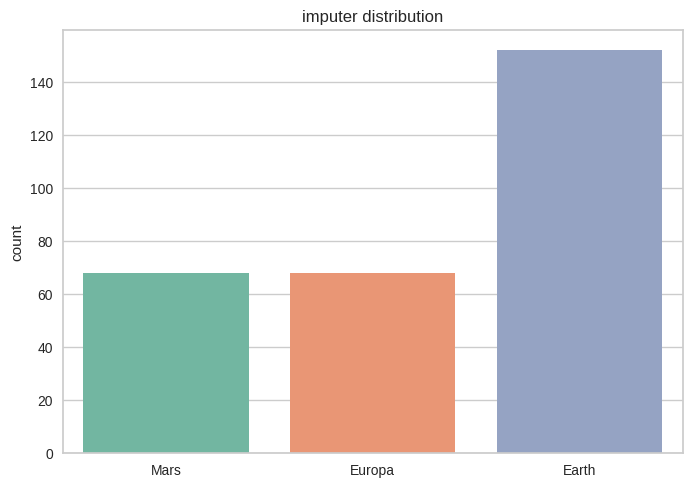

In [ ]:
#Impute using the distribution.
distribution = df['HomePlanet'].value_counts(normalize=True)
impu_val = np.random.choice(distribution.index, size = df['HomePlanet'].isna().sum(),
                 p = distribution.values)

plt.figure()
sns.countplot(x = impu_val, palette='Set2')
plt.title('imputer distribution')
plt.show()

In [ ]:
df.loc[df[df['HomePlanet'].isna()].index, 'HomePlanet'] = impu_val

- **CryoSleep**

In [ ]:
print('values as % of the total')
df.CryoSleep.value_counts()/len(df)*100

values as % of the total


CryoSleep
False    62.289900
True     35.319969
Name: count, dtype: float64

In [ ]:
#Impute using the distribution.
distribution = df['CryoSleep'].value_counts(normalize=True)
impu_val = np.random.choice(distribution.index, size = df['CryoSleep'].isna().sum(),
                 p = distribution.values)


impu_val

df.loc[df[df['CryoSleep'].isna()].index, 'CryoSleep'] = impu_val
df['CryoSleep'] = df['CryoSleep'].astype(bool)

- **Cabin**

In [ ]:
df['deck'] = df['Cabin'][df['Cabin'].notna()].apply(lambda x: x.split('/')[0])
df['num']  = df['Cabin'][df['Cabin'].notna()].apply(lambda x: x.split('/')[1])
df['side'] = df['Cabin'][df['Cabin'].notna()].apply(lambda x: x.split('/')[-1])

df = df.drop(['Cabin'], axis = 1)

In [ ]:
print('deck uniques:',len(df['deck'].unique()))
print('num uniques:',len(df['num'].unique()))
print('side uniques:',len(df['side'].unique()))

deck uniques: 9
num uniques: 1895
side uniques: 3


In [ ]:
df = df.drop(['num'], axis = 1)

In [ ]:
df.side.value_counts()

side
S    6381
P    6290
Name: count, dtype: int64

In [ ]:
#Impute using the mode.
df['side'] =  df['side'].fillna(df.side.mode()[0])

In [ ]:
df.deck.value_counts()

deck
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: count, dtype: int64

In [ ]:
#Impute using the distribution.
distribution = df['deck'].value_counts(normalize=True)
impu_val = np.random.choice(distribution.index, size = df['deck'].isna().sum(),
                 p = distribution.values)


impu_val

df.loc[df[df['deck'].isna()].index, 'deck'] = impu_val

- **Destination, VIP**

In [ ]:
#Impute using the distribution.

#Destination
distribution = df['Destination'].value_counts(normalize=True)
impu_val = np.random.choice(distribution.index, size = df['Destination'].isna().sum(),
                 p = distribution.values)

df.loc[df[df['Destination'].isna()].index, 'Destination'] = impu_val

In [ ]:
#VIP
# Impute using the mode.
df.VIP =  df.VIP.fillna(df.VIP.mode()[0])

### Numericals

In [ ]:
df.select_dtypes(np.number).isna().sum()

Age             270
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
numId             0
dtype: int64

- **Age**

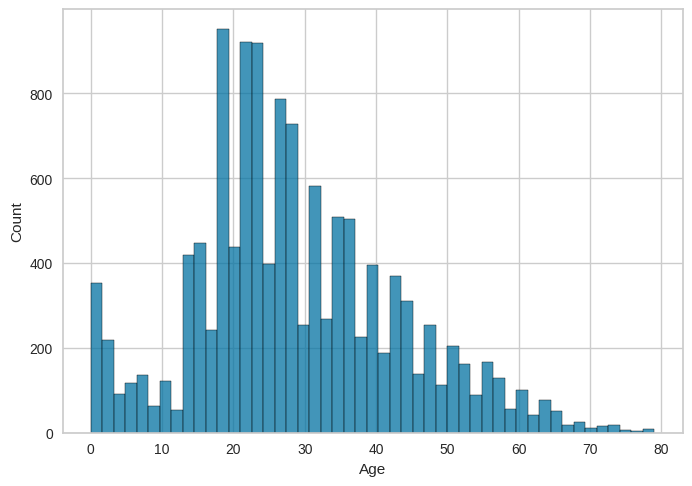

In [ ]:
plt.figure()
sns.histplot(df.Age)
plt.show()

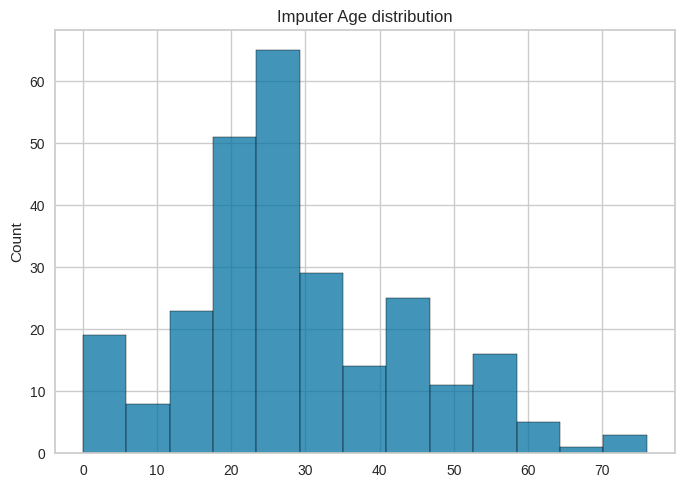

In [ ]:
#Impute using the distribution.
distribution = df['Age'].value_counts(normalize=True)
impu_val = np.random.choice(distribution.index, size = df['Age'].isna().sum(),
                 p = distribution.values)

plt.figure()
sns.histplot(impu_val)
plt.title('Imputer Age distribution')
plt.show()

In [ ]:
df.loc[df[df['Age'].isna()].index, 'Age'] = impu_val

- **RoomService - FoodCourt - ShoppingMall - Spa - VRDeck**

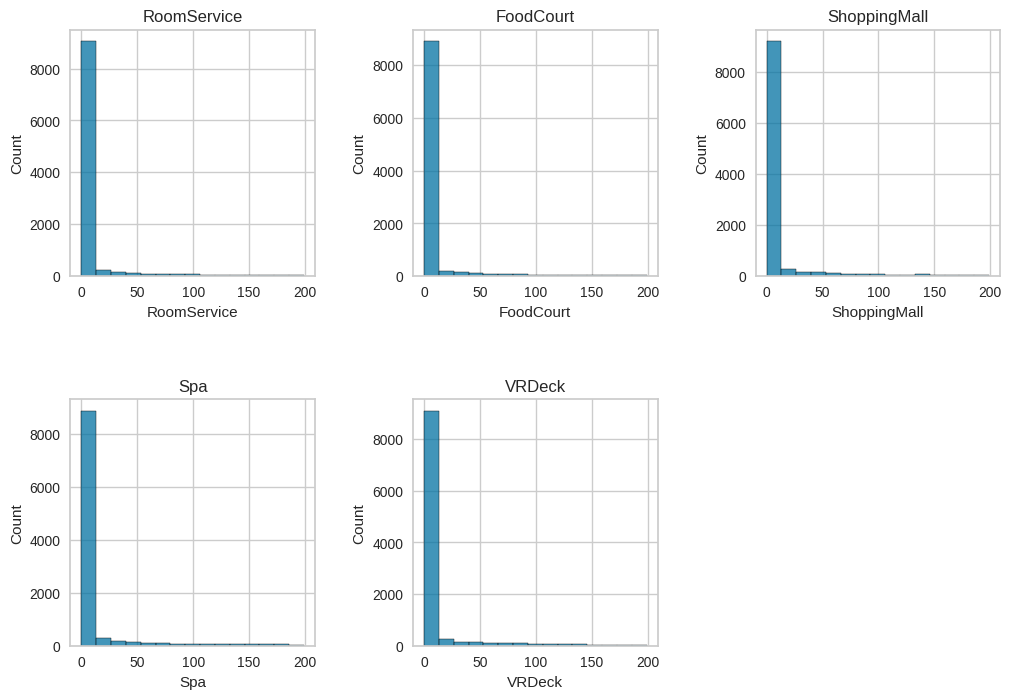

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.subplot(2,3,1)
sns.histplot(df.RoomService[lambda x: x<200])
plt.title('RoomService')

plt.subplot(2,3,2)
sns.histplot(df.FoodCourt[lambda x: x<200])
plt.title('FoodCourt')

plt.subplot(2,3,3)
sns.histplot(df.ShoppingMall[lambda x: x<200])
plt.title('ShoppingMall')


plt.subplot(2,3,4)
sns.histplot(df.Spa[lambda x: x<200])
plt.title('Spa')

plt.subplot(2,3,5)
sns.histplot(df.VRDeck[lambda x: x<200])
plt.title('VRDeck')

plt.show()

**All these categories are very skewed!**

In [ ]:
#Impute with 0.
df[['RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck']] = df[['RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [ ]:
df_1 = df.copy()

# **Step 4 | Exploratory Data Analysis (EDA)**

In [ ]:
df_visual = pd.concat([df_1.loc[:train.index.max(),:], target], axis = 1)

In [ ]:
#Do we have duplicates?
df_visual.duplicated().sum()

1266

In [ ]:
df_visual = df_visual.drop_duplicates()

HomePlanet  Transported
Earth       False          62.383472
            True           37.616528
Europa      False          38.559755
            True           61.440245
Mars        False          56.800000
            True           43.200000
Name: Transported, dtype: float64


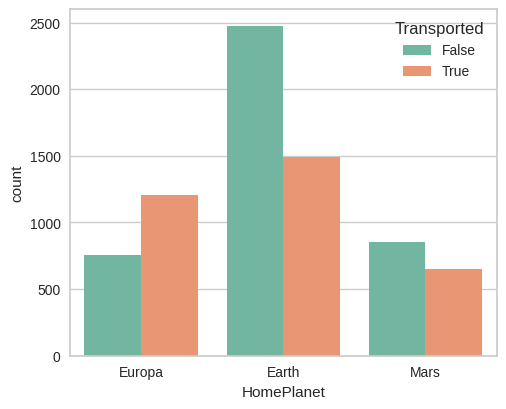

Destination    Transported
55 Cancri e    False          43.412265
               True           56.587735
PSO J318.5-22  False          55.932203
               True           44.067797
TRAPPIST-1e    False          58.565582
               True           41.434418
Name: Transported, dtype: float64


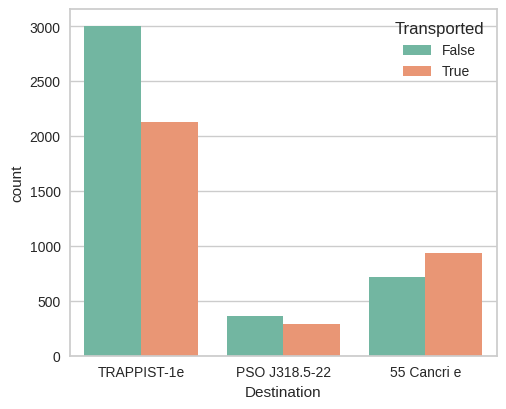

deck  Transported
A     False          51.153846
      True           48.846154
B     False          33.024691
      True           66.975309
C     False          35.277383
      True           64.722617
D     False          57.740586
      True           42.259414
E     False          64.416476
      True           35.583524
F     False          61.999222
      True           38.000778
G     False          55.667373
      True           44.332627
T     False          80.000000
      True           20.000000
Name: Transported, dtype: float64


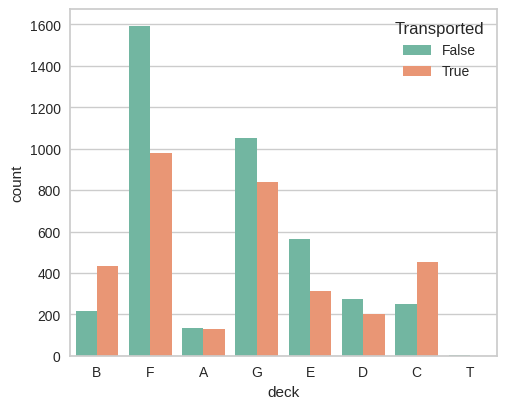

side  Transported
P     False          60.222531
      True           39.777469
S     False          50.052192
      True           49.947808
Name: Transported, dtype: float64


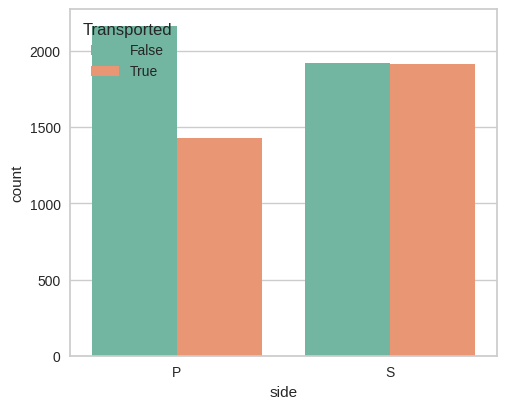

In [ ]:
for col in df_visual.select_dtypes(object):
    plt.figure(figsize=(5.5,4.5))
    sns.countplot(data=df_visual,x=col,hue='Transported',palette='Set2')
    print(df_visual.groupby([col,'Transported'])['Transported'].size()/df_visual.groupby([col])['Transported'].size()*100)
    plt.show()

### RoomService - FoodCourt - ShoppingMall - Spa - VRDeck

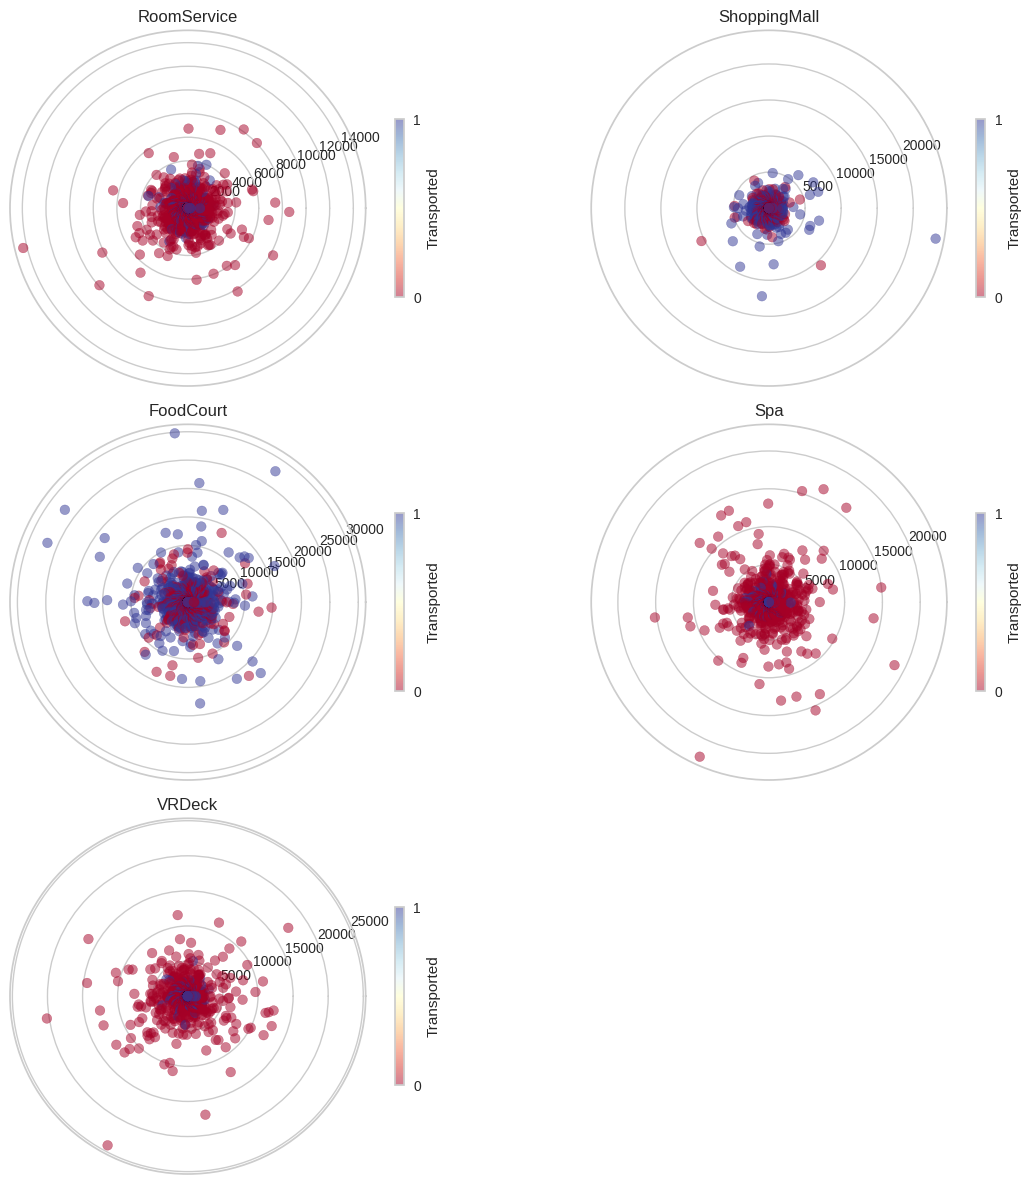

In [ ]:
angle = np.linspace(0, 2*np.pi, len(df_visual.RoomService), endpoint=False).tolist()

variables = ['RoomService', 'ShoppingMall', 'FoodCourt', 'Spa', 'VRDeck']

plt.figure(figsize=(12, 12))

for i, variable in enumerate(variables, start=1):
    plt.subplot(3, 2, i, polar=True)
    plt.xticks([])
    plt.title(variable)
    plt.scatter(angle,
                df_visual[variable],
                c=df_visual['Transported'],
                cmap=plt.cm.RdYlBu,
                alpha=0.5
               )
    plt.colorbar(label='Transported', shrink=0.5, ticks=[0, 1], aspect=20)

plt.tight_layout()
plt.show()

In [ ]:
df_1['SM_Category'] = None
df_1.loc[df_1['ShoppingMall'][lambda x: x<=200].index, 'SM_Category'] = 'SM_A'
df_1.loc[df_1['ShoppingMall'][lambda x: x>200].index, 'SM_Category'] = 'SM_B'

df_1['FC_Category'] = None
df_1.loc[df_1['FoodCourt'][lambda x: x<=200].index, 'FC_Category'] = 'FC_A'
df_1.loc[df_1['FoodCourt'][lambda x: x>200].index, 'FC_Category'] = 'FC_B'

# **Step 5 | Data Splitting for Modeling**

## Encoding Categoricals

In [ ]:
for col in df.select_dtypes(bool).columns:
    df_1[col] =  df_1[col].astype(int)

enc = LabelEncoder()
for col in df_1.select_dtypes(object).columns:
    df_1[col] = enc.fit_transform(df_1[col])

## Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(df_1.iloc[:,:])

df_1.iloc[:,:] = scaler.transform(df_1.iloc[:,:])

In [ ]:
df_2 = df_1.copy()

In [ ]:
target_final = target.copy()

## Split

In [ ]:
train_final = (df_2.loc[:train.index.max(),:]).copy()
test_final  = (df_2.loc[train.index.max()+1:,:].reset_index(drop = True)).copy()

In [ ]:
duplicated_index = train_final[train_final.duplicated(keep=False)].index

In [ ]:
target = target.drop(duplicated_index, axis = 0)

In [ ]:
train_final = train_final.drop(duplicated_index)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_final, target,test_size=0.2, random_state=2024, stratify=target)

## **Step 6 | Modeling**

## Model Selection<

In [ ]:
setup(data = pd.concat([X_train, y_train], axis = 1), target = 'Transported')
compare_models()

,Description,Value
0,Session id,510
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(5253, 16)"
4,Transformed data shape,"(5253, 16)"
5,Transformed train set shape,"(3677, 16)"
6,Transformed test set shape,"(1576, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8004,0.8684,0.7250,0.7829,0.7519,0.5854,0.5876,15.7680
gbc,Gradient Boosting Classifier,0.7996,0.8721,0.7458,0.7685,0.7567,0.5864,0.5869,0.4510
rf,Random Forest Classifier,0.7979,0.8580,0.6866,0.8031,0.7394,0.5761,0.5816,0.6230
lr,Logistic Regression,0.7966,0.8665,0.7126,0.7819,0.7450,0.5766,0.5788,0.8990
ada,Ada Boost Classifier,0.7955,0.8665,0.7315,0.7686,0.7494,0.5768,0.5776,0.2640
xgboost,Extreme Gradient Boosting,0.7919,0.8645,0.7100,0.7753,0.7401,0.5673,0.5700,0.2140
et,Extra Trees Classifier,0.7895,0.8417,0.6729,0.7940,0.7279,0.5581,0.5637,0.5450
svm,SVM - Linear Kernel,0.7789,0.0000,0.6937,0.7598,0.7234,0.5401,0.5434,0.0870
lda,Linear Discriminant Analysis,0.7620,0.8417,0.5800,0.7970,0.6705,0.4916,0.5074,0.0970
ridge,Ridge Classifier,0.7618,0.0000,0.5787,0.7973,0.6697,0.4909,0.5069,0.1070


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=510, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

<div style="border-radius:10px; padding: 15px; background-color: #9388C2; font-size:120%; text-align:left">
    
### Ensemble Learning (GradientBoostingClassifier)

## Hyper-parameter search

In [ ]:
gbc_params = {'n_estimators': [100,150, 200],
              'learning_rate': [0.01, 0.05, 0.1],
              'max_depth': [2,4,6,8],
              'random_state': [256],
              'max_features': ['sqrt']
}

gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params, scoring='accuracy', n_jobs=-1, cv=6)
gbc.fit(X_train, y_train)
gbc_params = gbc.best_params_

print('Best Params gbc model:',gbc.best_params_)
print('Best Score gbc model :', gbc.best_score_)
print('\n')

Best Params gbc model: {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 256}
Best Score gbc model : 0.8124877147205916




### Training

In [ ]:
gbc_model = GradientBoostingClassifier(**gbc_params)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='log_loss', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=200, n_iter_no_change=None,
                           random_state=256, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Metrics

In [ ]:
cv_results= pd.DataFrame(cross_validate(gbc_model, X_train, y_train, scoring=['accuracy'],
                                        return_train_score= True, verbose = 0, n_jobs=-1, cv=6)).rename(columns= {'test_accuracy':'val_accuracy'}).iloc[:,2:]

test_score = accuracy_score(y_true= y_test, y_pred = gbc_model.predict(X_test))
train_score = cv_results['train_accuracy'].mean()
val_score = cv_results['val_accuracy'].mean()

print('Training Score: ', train_score*100)
print('Validation Score: ', val_score*100)
print('Test Score: ', test_score*100)

#Metrics, first try...
#Training Score:  82.63733103249929
#Validation Score:  80.41415012942194
#Test Score:  79.47096032202415

Training Score:  88.81782389700665
Validation Score:  81.24877147205916
Test Score:  79.22374429223744


### Feature Importance

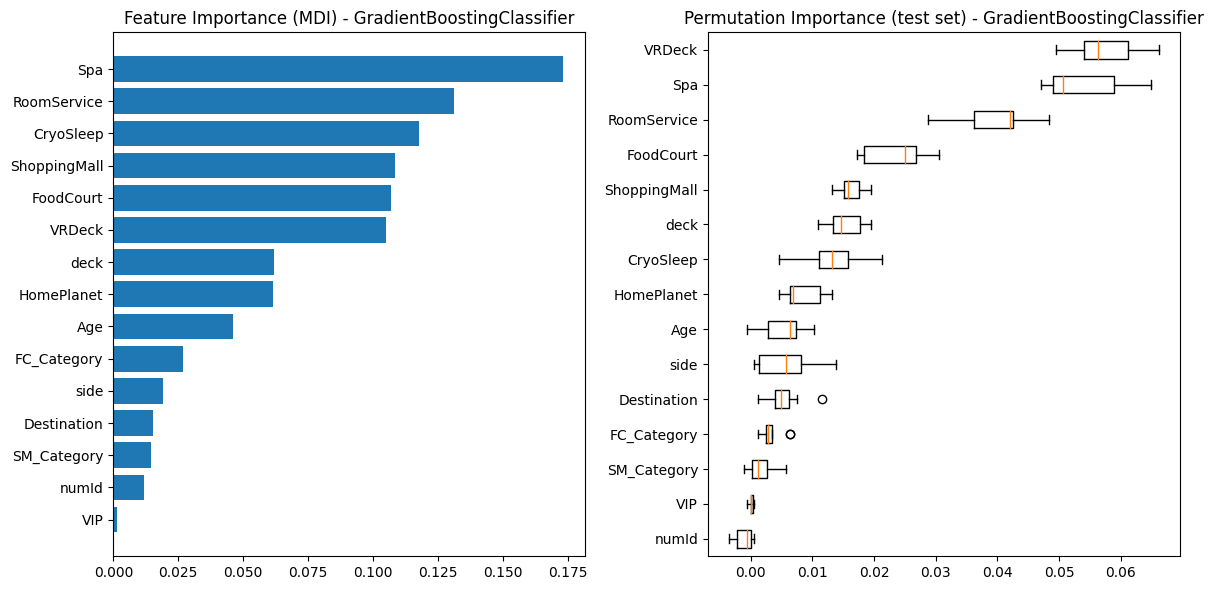

In [ ]:
feature_importance = gbc_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_1.columns)[sorted_idx])
plt.title("Feature Importance (MDI) - GradientBoostingClassifier")

result = permutation_importance(
    gbc_model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(train_final.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set) - GradientBoostingClassifier")
fig.tight_layout()
#plt.savefig('Feature Importance-gbc.png', dpi=400)
plt.show()

# **Step 7 | Predictions and Submission**

In [ ]:
final_predictions = gbc_model.predict(test_final)
final_predictions = final_predictions.astype(bool)
submission = pd.concat([ID, pd.Series(final_predictions, name = 'Transported')], axis= 1)
submission.to_csv('/kaggle/working/submission_v9.csv',index=False, header= True)